### Optimize the Loan eligibility process
Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [503]:
# Requirement Libraries
import pandas as pd
import numpy as np

In [504]:
# Requirement libraries for visulization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [505]:
# Read the train, test and submission
train = pd.read_csv('hack_train.csv')
test = pd.read_csv('hack_test.csv')
submission = pd.read_csv('hack_submission.csv')

In [506]:
# To see the number of features and observations
train.shape, test.shape, submission.shape

((614, 13), (367, 12), (367, 2))

In [507]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [508]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [509]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [510]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [511]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [512]:
# box plot
# for col in train.select_dtypes(exclude='object').columns:
#    sns.boxplot(train[col])

In [513]:
# box plot for object
#for col in train.select_dtypes(include='object').columns.drop(['Loan_ID']).tolist():
#    sns.boxplot(train[col])
#    plt.show()

In [514]:
col = train.columns.tolist()
col.remove('Loan_ID')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [515]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [516]:
train['Dependents'].replace({'3+:':3}, inplace=True)

In [517]:
num_cols = train.select_dtypes(exclude='object').columns.to_list()
cat_cols = train.select_dtypes(include='object').columns.drop(['Loan_ID','Loan_Status']).to_list()


In [518]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [519]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

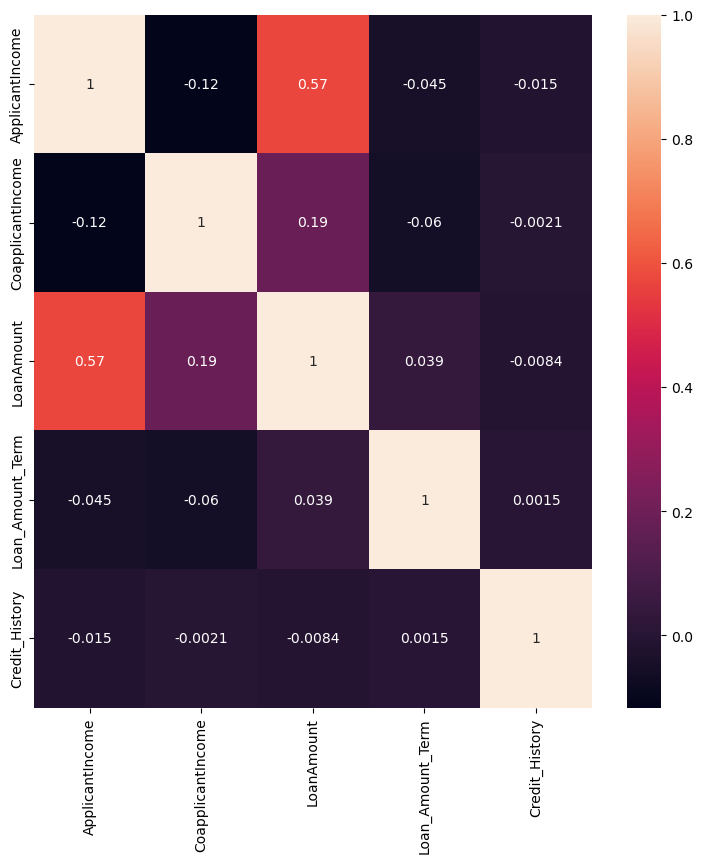

In [520]:
plt.figure(figsize=(9,9))
sns.heatmap(train.drop(columns=['Loan_ID']).select_dtypes(include=np.number).corr(), annot = True)
plt.show()

In [521]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [522]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [523]:
cat_pipe_encode = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='most_frequent')), # impute the categorical values
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [524]:
num_pipe_encode = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='median')), # impute the number values
        ('scale', StandardScaler())
    ]
)

In [525]:
# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('cat_transformer', cat_pipe_encode, cat_cols),
        ('num_transformer', num_pipe_encode, num_cols)
    ]
)

In [526]:
model_pipeline = Pipeline(
    steps=[
        ('Preprocessing', preprocess),
        ('polynomial', PolynomialFeatures(degree=2)),
        ('model', LogisticRegression())
    ]
)

In [527]:
tgt_col = ['Loan_Status']
ign_cols = ['Loan_ID','Loan_Status']

In [528]:
X = train.drop(columns=ign_cols)
y = train[tgt_col]

In [529]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [530]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [531]:
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [532]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((491, 11), (123, 11), (491, 1), (123, 1))

In [533]:
# Convert target labels to numeric if they are strings
label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)  # Converts 'Y', 'N' to 1, 0
val_y = label_encoder.transform(val_y)

In [534]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_transformer',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('polynomial', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [535]:
# Perform prediction with train itself
model_pipeline.predict(train_X)

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,

In [536]:
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [537]:
def model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline):

    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y, predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y, predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y, predicted_train_tgt),sep='\n')
    print('Train cnf_matrix', confusion_matrix(val_y, predicted_val_tgt),sep='\n')

In [538]:
model_train_val_eval(train_X, val_X, train_y, val_y, model_pipeline)

Train AUC
0.7844695631696691
Valid AUC
0.6843023255813954
Train cnf_matrix
[[ 90  59]
 [ 12 330]]
Train cnf_matrix
[[18 25]
 [ 4 76]]


In [539]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [540]:
param = [
    {
        'model': [LogisticRegression()],
        'model__penalty': ['l2', None],
        'model__C': [0.5, 3]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3, 5]
    },
    {
        'model': [StackingClassifier(
            estimators=[
                ['sclf1', RandomForestClassifier()],
                ['sclf2', XGBClassifier()],
                ['sclf3', CatBoostClassifier(verbose=0)],  # Added CatBoost
            ],
            final_estimator=LogisticRegression()
        )],
        'model__sclf1__max_depth': [4, 8],
        'model__sclf2__n_estimators': [50, 100],  # Increase n_estimators for XGBoost
        'model__sclf3__iterations': [100, 200],  # CatBoost parameter
        'model__sclf3__depth': [4, 6]  # Tuning CatBoost depth
    }
]

In [541]:
grid = GridSearchCV(estimator=model_pipeline,param_grid=param, cv=2, scoring='roc_auc')

In [542]:
from imblearn.over_sampling import RandomOverSampler 
over_sampling = RandomOverSampler()

In [543]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [544]:
grid.fit(train_X_os,train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('Preprocessing',
                                        ColumnTransformer(transformers=[('cat_transformer',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area']),
                                                                        ('num_transformer',
                                                                         Pipeline(steps=[('impute...
                                                                                  multi_strategy=None,
                                                                                  n_estimators=None,
                                                                                  n_jobs=None,
                                                                                  num_parallel_tree=None,
                                                                                  random_state=None, ...)],
                                                                   ['sclf3',
                                                                    <catboost.core.CatBoostClassifier object at 0x000001CA56E94510>]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [50, 100],
                          'model__sclf3__depth': [4, 6],
                          'model__sclf3__iterations': [100, 200]}],
             scoring='roc_auc')

In [545]:
grid.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()],
                                ['sclf2',
                                 XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                          

In [546]:
grid.best_estimator_

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num_transformer',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='me...
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...)],
                                                ['sclf3',
                                                 <catboost.core.CatBoostClassifier object at 0x000001CA56E88C50>]],
                                    final_estimator=LogisticRegression()))])

In [547]:
new_model = grid.best_estimator_

In [548]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
1.0
Valid AUC
0.6950581395348838
Train cnf_matrix
[[149   0]
 [  0 342]]
Train cnf_matrix
[[20 23]
 [ 6 74]]


In [549]:
import joblib
joblib.dump(new_model,'load_prediction_model.pkl')

['load_prediction_model.pkl']

In [550]:
submission['Loan_Status']=new_model.predict(test)

In [552]:
submission.to_csv('submission_XGboosting.csv', index=False)

In [555]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [557]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
